## Введение в анализ данных, ИАД-6

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №1

Задание выполнил(а): Селиванова Валерия

### Общая информация

__Дата выдачи:__ 06.02.2020

__Дедлайн:__ 17.02.2020 23:59

### О задании

В этом домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib.

### Оценивание и штрафы

Каждая задача оценивается в 1 балл.

Оценка за ДЗ вычисляется по следующей формуле:

$$
\left(\min(9, s_{\text{numpy}}) + \min(12, s_{\text{pandas}}) + \min(2, s_{\text{matplotlib}})\right) \times 10 / 23,
$$

где $s_{\text{numpy}}$, $s_{\text{pandas}}$ и $s_{\text{matplotlib}}$ — количество баллов, которое вы набрали за соответствующую часть. Задач больше, чем необходимо сделать для получения полного балла за ДЗ — вы можете сделать те, которые вам больше нравятся, или сделать все, чтобы дополнительно потренироваться. За каждые 2 задачи сверх обязательных (9 в первой части, 12 во второй и 2 в третьей) идет балл в бонус. Таким образом, за это домашнее задание можно получить 2 бонусных балла.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл от оценки в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

## Часть 1. Numpy

Необходимое, но не достаточное условие для успешного выполнения этой части — вам необходимо пройти все `assert`'ы.

In [1]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.4, вес контрольной - 0.2, вес проверочных - 0.1. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [2]:
def result_mark(weights: np.array, marks: np.array) -> int:
    a = zip (weights, marks)
    return np.round (sum (list (map (np.prod, list (a)))), 0)

In [3]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 10, 8, 6])

assert result_mark(weights, marks) == 8

In [4]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### 2

Напишите функцию, которая принимает на вход два целочисленных массива одинаковой длины, и возвращает минимальный и максимальный из тех элементов этих двух массивов у которых совпадает и позиция и значение (то есть из всех элементов $\{a[i]: a[i] = b[i]\}$). Например, для `a = np.array([4, 2, 6, 3])` и `b = np.array([4, 3, 6, -3])` ответом является кортеж `(4, 6)`.

In [5]:
def minMaxEqual(a: np.array, b: np.array) -> tuple:
    c = a [a == b]
    return c.min(), c.max ()

In [6]:
a = np.array([4, 2, 6, 3])
b = np.array([4, 3, 6, -3])

assert minMaxEqual(a, b) == (4, 6)

In [7]:
a = np.array([0, 0, 0, 0, 0])
b = np.array([0, 0, 0, 0, 0])

assert minMaxEqual(a, b) == (0, 0)

In [8]:
a = np.array([-1, -1, -1, 1, 0])
b = np.array([1, -1, 1, 1, 0])

assert minMaxEqual(a, b) == (-1, 1)

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**).

In [9]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
    return np.argwhere (np.abs (array1 - array2) < precision).T[0]

In [10]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

In [11]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [12]:
def block_matrix(block: np.array) -> np.array:
    return np.tile (block, (2, 2))

In [13]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [14]:
def diag_prod(matrix: np.array):
    a = matrix.diagonal ()
    b = a [a != 0]
    return np.multiply.reduce (b)

In [15]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$
Учтите, что в вашей матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [16]:
def normalize(matrix: np.array) -> np.array:
    a = map (lambda x: (x - np.mean(x)) / np.std(x), matrix.T)
    return np.array (list (a)).T

In [17]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [18]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

### 7

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [19]:
def make_symmetric(matrix: np.array) -> np.array:
    return matrix + matrix.T - np.diag (np.diag (matrix))

In [20]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [21]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### 8

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [22]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    return np.tile (np.arange (a, b + 1), (m, 1))

In [23]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [24]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

### 9

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [25]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    return np.dot (vec1, vec2) / (np.linalg.norm (vec1) * np.linalg.norm (vec2))

In [26]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [27]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

### 10

Напишите функцию, которая принимает параметры `lims: ndarray размера 2`, `k: float`, `b: float`, `n: int`, `noise_level: float` и возвращает выборку из n объектов, сгенерированную по правилу `y_i = k*x_i + b + U[-noise_level; noise_level]`. Где каждый x_i генерируется равномерно из `U[lims[0]; lims[1]]` (U[a, b] — равномерное распределение на [a, b]). Функция должна возвращать кортеж, первым элементом которого будет массив x, и вторым элементом массив y — значения функции в точках этого массива.

In [81]:
def gen_data(lims: np.array, k: float, b: int, n: int, noise_level: float):
    x = np.array (np.random.uniform (lims[0], lims[1], size = n))
    u = np.array (np.random.uniform (-noise_level, noise_level, size = n))
    y = k * x + b + u
    return (x, y)

In [82]:
# Выход должен выглядеть примерно так

gen_data((-1, 1), 2, 0, 20,  1e-1)

(array([ 0.64614825,  0.36204445, -0.35761822,  0.49196998, -0.97149664,
        -0.21588702, -0.90557802,  0.88321263,  0.10055445, -0.68535157,
         0.31753264, -0.14292851,  0.78821592, -0.031667  ,  0.95887677,
         0.64493679,  0.9880651 ,  0.91649822,  0.73671801,  0.91896424]),
 array([ 1.39091947,  0.69392613, -0.76496336,  0.96124762, -1.84891295,
        -0.48859984, -1.81988568,  1.75096121,  0.21732448, -1.40461665,
         0.58693402, -0.23538251,  1.67343224, -0.12628595,  1.93813296,
         1.33446621,  1.8822415 ,  1.92251138,  1.48234718,  1.74178524]))

## Часть 2. Pandas

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [30]:
data = pd.read_csv ('train.csv', delimiter=',')

In [31]:
print ('Рамер таблицы:', data.shape)

Рамер таблицы: (891, 12)


In [32]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

- PassengerId	- другое
- Survived - категориальный
- Pclass - порядковый
- Name - другое
- Sex - категориальный
- Age - вещественный
- SibSp - вещественный
- Parch - вещественный
- Ticket - вещественный
- Fare - вещественный
- Cabin - категориальный
- Embarked - категориальный


1. Задача регрессии: установить взаимосвязь между классом, в котором ехал пассажир, и выживаемостью.
2. Задача классификации: классифицировать пассажиров по достатку, в зависимости от суммы за билет и класса обслуживания.
3. Задача кластеризации: разбить выживших на несколько кластеров в зависимости от пола, цены за билет и наличия детей (например, бедные женщины с детьми, богатые межчины без детей, богатые женщины с детьми и т. д.).

### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [34]:
print ('Доля выживших после крушения:', data ['Survived'].value_counts()[1] / data.shape[0])
print ('Доля мужчин среди выживших:', data [data ['Survived'] == 1]['Sex'].value_counts()['male'] / data [data ['Survived'] == 1].shape[0])
print ('Доля женщин среди выживших:', data [data ['Survived'] == 1]['Sex'].value_counts()['female'] / data [data ['Survived'] == 1].shape [0])

Доля выживших после крушения: 0.3838383838383838
Доля мужчин среди выживших: 0.31871345029239767
Доля женщин среди выживших: 0.6812865497076024


### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [35]:
print ('Количество пассажиров в 1 классе:', data ['Pclass'].value_counts()[1])
print ('Количество пассажиров во 2 классе:', data ['Pclass'].value_counts()[2])
print ('Количество пассажиров в 3 классе:', data ['Pclass'].value_counts()[3])

Количество пассажиров в 1 классе: 216
Количество пассажиров во 2 классе: 184
Количество пассажиров в 3 классе: 491


In [36]:
print ('Количество женщин в 3 классе:', data [data ['Pclass'] == 3]['Sex'].value_counts()['female'])
print ('Количество мужчин в 3 классе:', data [data ['Pclass'] == 3]['Sex'].value_counts()['male'])

Количество женщин в 3 классе: 144
Количество мужчин в 3 классе: 347


### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

In [37]:
print ('Минимальная сумма за проезд:', data ['Fare'].min())
print ('Средняя сумма за проезд:', data ['Fare'].mean())
print ('Максимальная сумма за проезд:', data ['Fare'].max ())
print ('Минимальная сумма за проезд пассажиров из Саутгемптона:', data [data ['Embarked'] == 'S'].Fare.min())
print ('Средняя сумма за проезд пассажиров из Саутгемптона:', data [data ['Embarked'] == 'S'].Fare.mean())
print ('Максимальная сумма за проезд пассажиров из Саутгемптона:', data [data ['Embarked'] == 'S'].Fare.max())

Минимальная сумма за проезд: 0.0
Средняя сумма за проезд: 32.2042079685746
Максимальная сумма за проезд: 512.3292
Минимальная сумма за проезд пассажиров из Саутгемптона: 0.0
Средняя сумма за проезд пассажиров из Саутгемптона: 27.07981180124218
Максимальная сумма за проезд пассажиров из Саутгемптона: 263.0


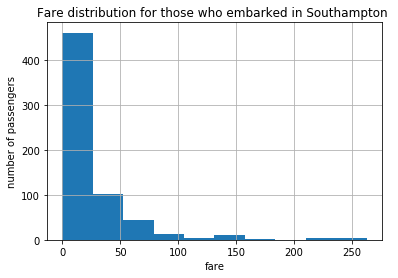

In [38]:
plt.figure()
plt.title('Fare distribution for those who embarked in Southampton ')
data[data['Embarked'] == 'S'].Fare.hist()
plt.xlabel('fare')
plt.ylabel('number of passengers')
plt.show()

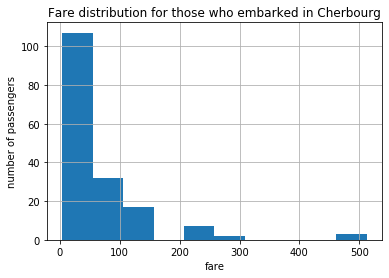

In [39]:
plt.figure()
plt.title('Fare distribution for those who embarked in Cherbourg')
data[data['Embarked'] == 'C'].Fare.hist()
plt.xlabel('fare')
plt.ylabel('number of passengers')
plt.show()

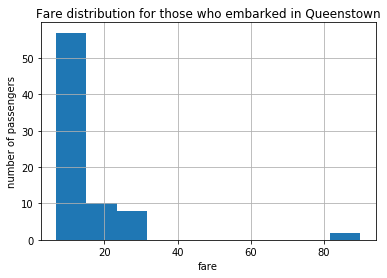

In [40]:
plt.figure()
plt.title('Fare distribution for those who embarked in Queenstown')
data[data['Embarked'] == 'Q'].Fare.hist()
plt.xlabel('fare')
plt.ylabel('number of passengers')
plt.show()

### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

С точки зрения науки о данных, некоторые признаки, приведенные в таблице, бесполезны для исследования. Например, признаки Name и PassangerId не несут никакой информации, которая могла бы пригодиться для решения какого-либа типа задачи. Признак Ticket также вряд ли сможет пригодиться для выполнения задач регрессии, классификации или др. Остальные могут быть существенными для решения подобных задач.

In [41]:
data.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [43]:
data.isnull().any().any()

True

In [44]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Пропуски есть в столбцах Age, Cabin, Embarked

In [45]:
print ('Количество пропусков в столбце Age:', sum (data ['Age'].isnull()))
print ('Количество пропусков в столбце Cabin:', sum (data ['Cabin'].isnull()))
print ('Количество пропусков в столбце Embarked:', sum (data ['Embarked'].isnull()))

Количество пропусков в столбце Age: 177
Количество пропусков в столбце Cabin: 687
Количество пропусков в столбце Embarked: 2


### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

Признак Age - вещественный, поэтому его будет логично заполнить средним значением в этом столбце.

In [46]:
data.loc [data ['Age'].isnull(), 'Age'] = np.mean (data ['Age'])

Признак Cabin мог бы помочь выявить опеределенные зависимости с другими переменными, в том числе с выживаемостью (т. к. определенный тип каюты - это определенное место на судне), однако для большинства пассажиров этот признак отсутствует, что делает невозможным качественное выявление связей. Следовательно, представляется логичным заполнить проспуски в этом столбце любыми значениями.

In [47]:
data.loc [data ['Cabin'].isnull(), 'Cabin'] = 'Y0UD1E'

В столбце Embarked всего 2 проспука, поэтому логично будет заменить их на наиболее часто встречающееся значение в этом признаке - S.

In [48]:
data.loc [data ['Embarked'].isnull(), 'Embarked'] = 'S'

In [49]:
data.isnull().any().any()

False

Пропусков в данных больше нет.

### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

In [50]:
data.loc [:, ['Age', 'Fare']].corr().iloc [0, 1]

0.09156609328505784

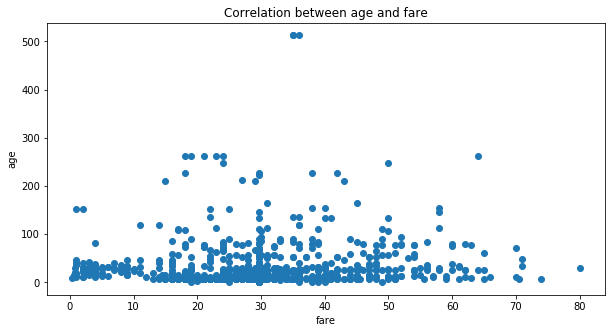

In [51]:
plt.figure(figsize = (10, 5))
plt.title('Correlation between age and fare')
plt.scatter (data ['Age'], data ['Fare'])
plt.xlabel('fare')
plt.ylabel('age')
plt.show()

Корреляция между возрастом пассажиров и ценой за билет очень низкая.

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса? А от места посадки?

In [52]:
data.loc [:, ['Survived', 'Fare']].corr().iloc[0,1]

0.2573065223849618

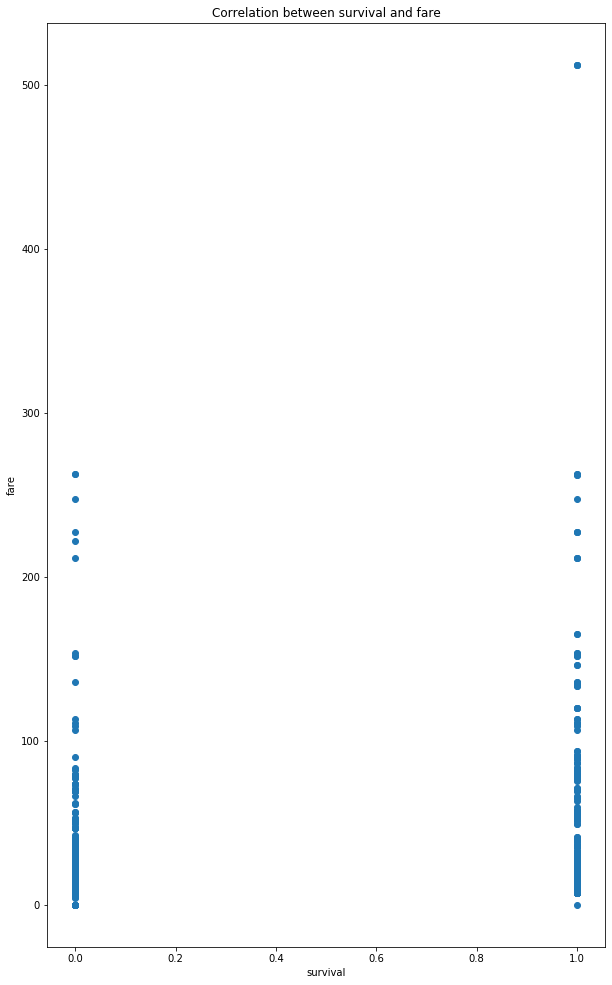

In [53]:
plt.figure(figsize = (10, 17))
plt.title('Correlation between survival and fare')
plt.scatter (data ['Survived'], data ['Fare'])
plt.xlabel('survival')
plt.ylabel('fare')
plt.show()

Значение корреляции между выживаемостью и ценой билета - среднее. На графике также видно, что среди выживших пассажиров больше тех, кто купил более дорогой билет. Следовательно, можно предположить наличие прямой взаимосвязи между ценой билета и выживаемостью (чем более дорогой билет, тем выше вероятность выжить).

In [54]:
data.groupby ('Pclass')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0
2,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
3,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0


В данном случае среднее значение по классам - это процент выживаемости. У пассажиров 1-ого класса он значительно выше, поэтому можно предположить взаимосвязь между классом обслуживания и вероятностью выжить (чем выше класс обслуживания, тем выше вероятность выжить).

In [56]:
data.groupby ('Embarked')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,168.0,0.553571,0.498608,0.0,0.0,1.0,1.0,1.0
Q,77.0,0.389610,0.490860,0.0,0.0,0.0,1.0,1.0
S,646.0,0.339009,0.473740,0.0,0.0,0.0,1.0,1.0


Здесь, как и в таблице выше, среднее значение по месту посадки на борт - это процент выживаемости. У пассажиров, которые сели в Шебуре, он значительно выше, чем у тех, кто сел в Квинтауне или в Саутгемптоне. Следовательно, можно предположить взаимосвязь между местом посадки и вероятностью выжить.

### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

Добавим признак Family, который будет показывать, сколько родных плыло с пассажиром, включая его самого.

In [57]:
data ['Family'] = data ['SibSp'] + data ['Parch'] + 1
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Y0UD1E,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Y0UD1E,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Y0UD1E,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Y0UD1E,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Y0UD1E,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1


Добавим переменную Relatives, которая будет показывать, сколько родственников плыло с пассажиром, не включая его.

In [59]:
data ['Relatives'] = data ['SibSp'] + data ['Parch']
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Y0UD1E,S,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Y0UD1E,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Y0UD1E,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Y0UD1E,S,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Y0UD1E,S,4,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1,0


### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

Задание: какое имя было самым популярным на корабле?

In [60]:
names = data ['Name'].str.split(expand = True).iloc[:, :3][2].str.replace(',', '')
names.value_counts()

William    48
John       31
Thomas     19
George     16
Charles    16
           ..
Malake      1
Alden       1
Helene      1
Milton      1
Len         1
Name: 2, Length: 435, dtype: int64

### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

Построим гистограммы для признаков Age, Fare, SibSp и Parch. У нас есть еще один вещественный признак - Ticket, но построить гистограмму для него затруднительно, т. к. он принимает совершенно разные не численные значения.

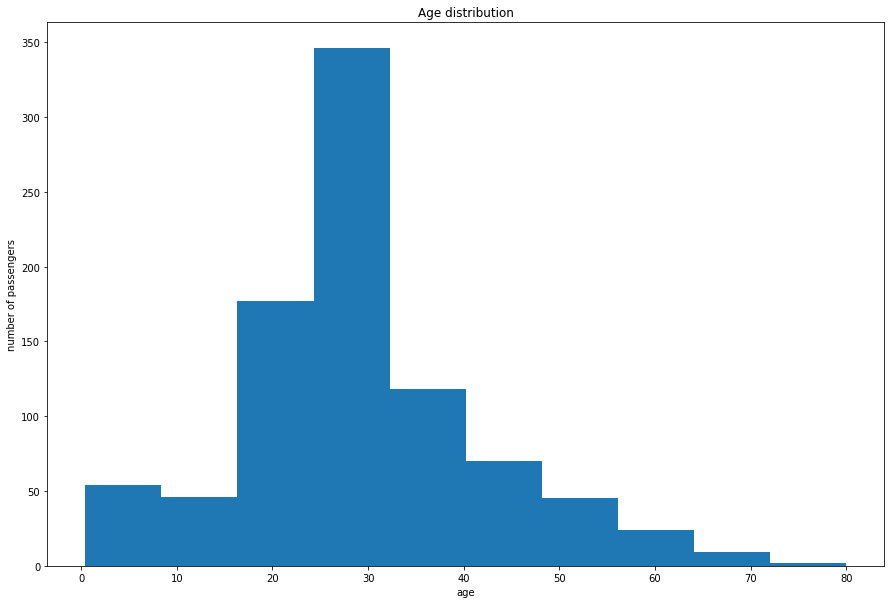

In [92]:
plt.figure(figsize = (15,10))
plt.title('Age distribution')
plt.hist (data ['Age'])
plt.xlabel('age')
plt.ylabel ('number of passengers')
plt.show()

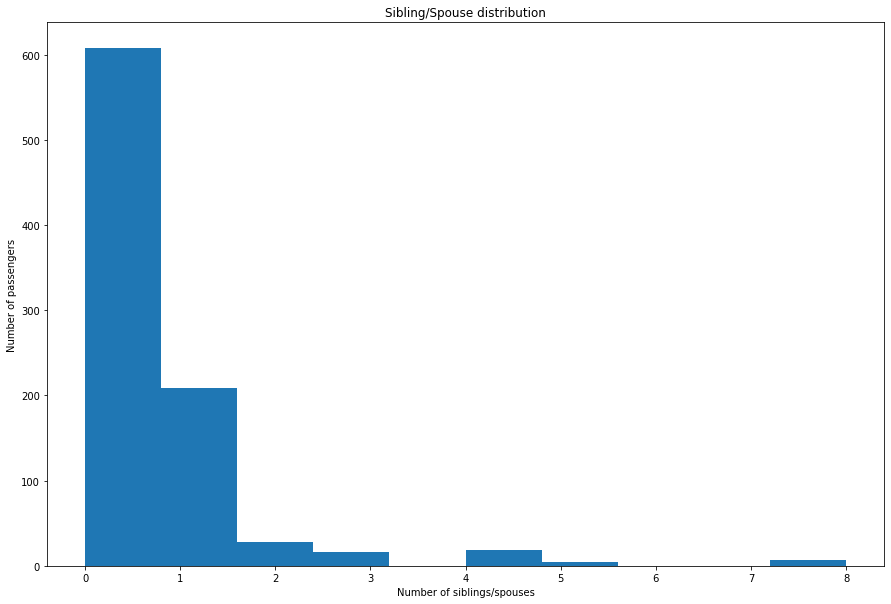

In [89]:
plt.figure(figsize = (15,10))
plt.title('Sibling/Spouse distribution')
plt.hist (data ['SibSp'])
plt.xlabel('Number of siblings/spouses')
plt.ylabel ('Number of passengers')
plt.show()

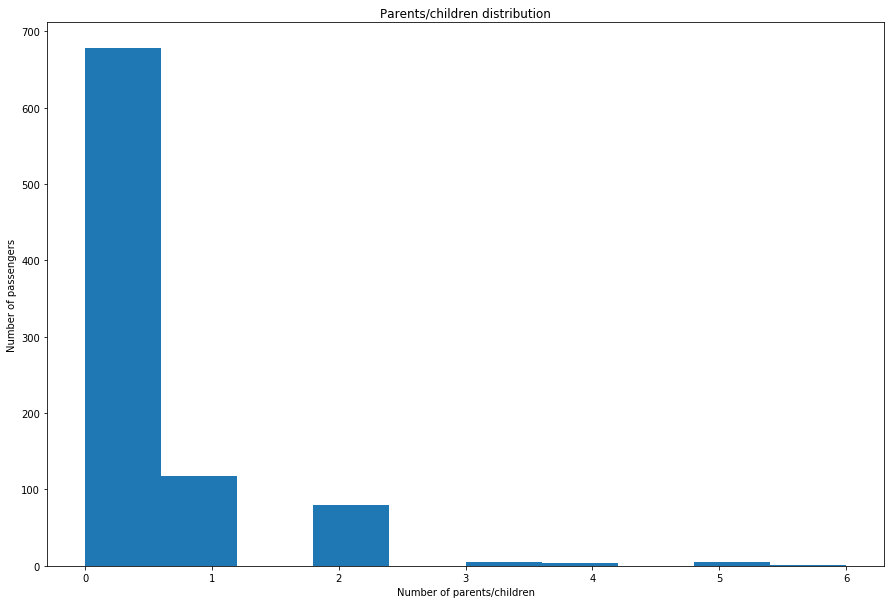

In [63]:
plt.figure(figsize = (15,10))
plt.title('Parents/children distribution')
plt.hist (data ['Parch'])
plt.xlabel('Number of parents/children')
plt.ylabel ('Number of passengers')
plt.show()

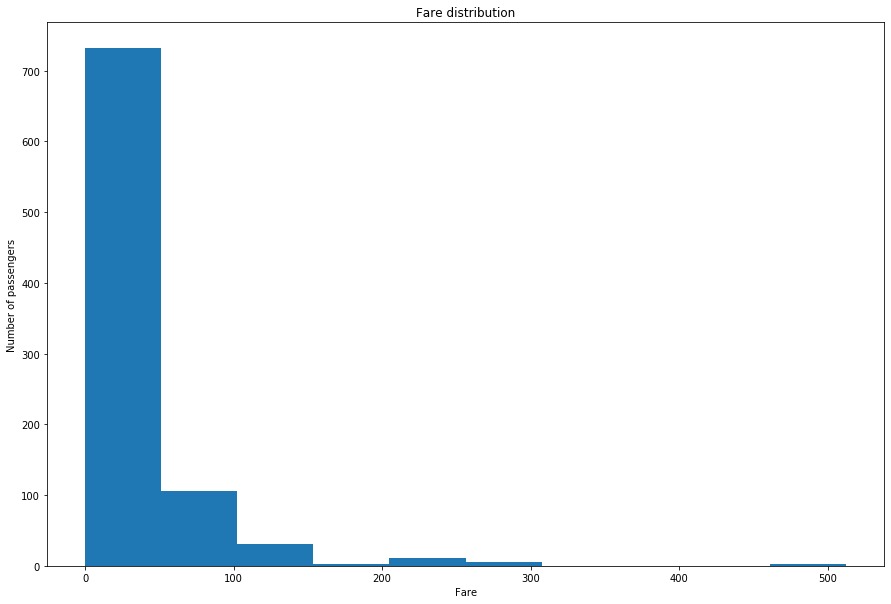

In [93]:
plt.figure(figsize = (15,10))
plt.title('Fare distribution')
plt.hist (data ['Fare'])
plt.xlabel('Fare')
plt.ylabel ('Number of passengers')
plt.show()

В гистограммах есть разница. Распределение Age блико к нормальному: оно сосредоточено вокруг среднего значения ~ 30 и постепенно уменьшается к краям. В случае с остальными переменными - другая ситуация. Их распределение не похоже на нормальное. Оно ассимитрично и сосредоточено вокруг 0. В таком случае труднее анализировать данные. Следует отнормировать вещественные переменные.

In [65]:
data ['AgeN'] = (data ['Age'] - data ['Age'].mean()) / data['Age'].std()
data ['SibSpN'] = (data ['SibSp'] - data ['SibSp'].mean()) / data ['SibSp'].std()
data ['ParchN'] = (data ['Parch'] - data ['Parch'].mean()) / data ['Parch'].std()
data ['FareN'] = (data ['Fare'] - data ['Fare'].mean()) / data ['Fare'].std()
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Relatives,AgeN,SibSpN,ParchN,FareN
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Y0UD1E,S,2,1,-5.921480e-01,0.432550,-0.473408,-0.502163
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,2,1,6.384304e-01,0.432550,-0.473408,0.786404
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Y0UD1E,S,1,0,-2.845034e-01,-0.474279,-0.473408,-0.488580
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2,1,4.076970e-01,0.432550,-0.473408,0.420494
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Y0UD1E,S,1,0,4.076970e-01,-0.474279,-0.473408,-0.486064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Y0UD1E,S,1,0,-2.075923e-01,-0.474279,-0.473408,-0.386454
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1,0,-8.228815e-01,-0.474279,-0.473408,-0.044356
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Y0UD1E,S,4,3,4.371893e-15,0.432550,2.007806,-0.176164
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1,0,-2.845034e-01,-0.474279,-0.473408,-0.044356


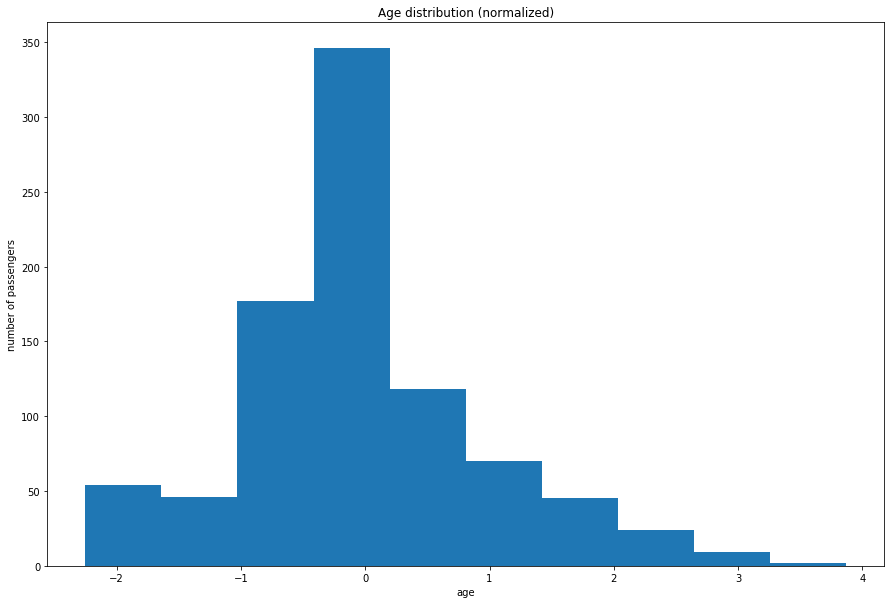

In [66]:
plt.figure(figsize = (15,10))
plt.title('Age distribution (normalized)')
plt.hist (data ['AgeN'])
plt.xlabel('age')
plt.ylabel ('number of passengers')
plt.show()

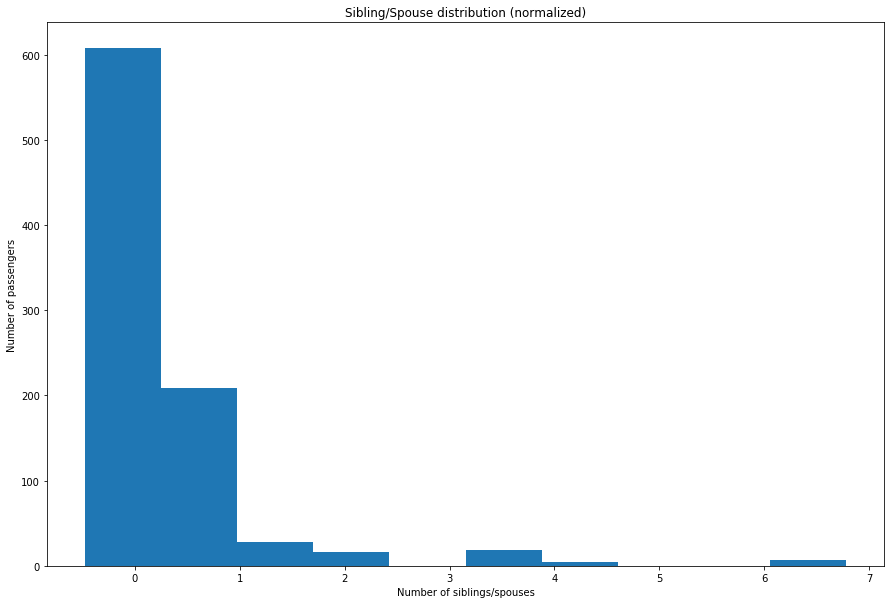

In [67]:
plt.figure(figsize = (15,10))
plt.title('Sibling/Spouse distribution (normalized)')
plt.hist (data ['SibSpN'])
plt.xlabel('Number of siblings/spouses')
plt.ylabel ('Number of passengers')
plt.show()

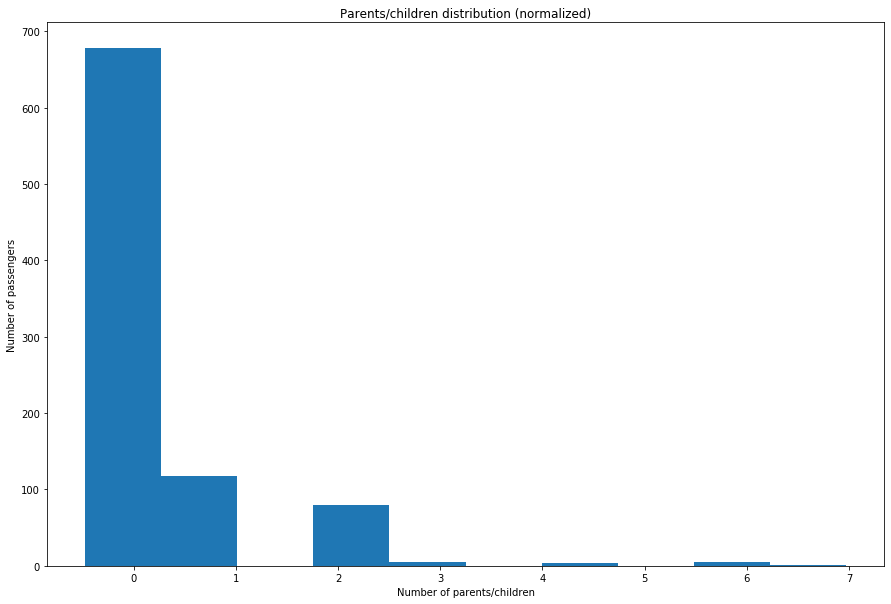

In [68]:
plt.figure(figsize = (15,10))
plt.title('Parents/children distribution (normalized)')
plt.hist (data ['ParchN'])
plt.xlabel('Number of parents/children')
plt.ylabel ('Number of passengers')
plt.show()

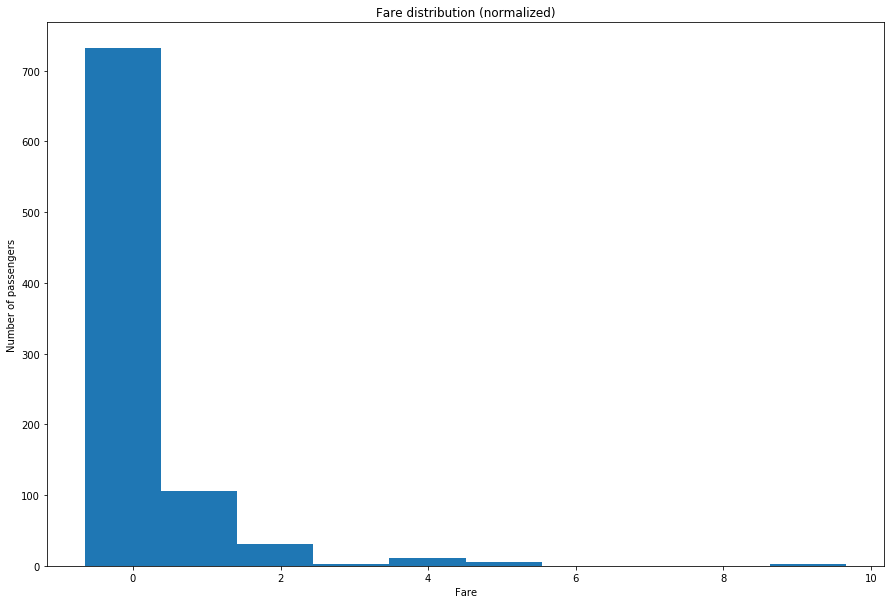

In [69]:
plt.figure(figsize = (15,10))
plt.title('Fare distribution (normalized)')
plt.hist (data ['FareN'])
plt.xlabel('Fare')
plt.ylabel ('Number of passengers')
plt.show()

Ситуация изменилась: теперь значения всех гистограмм сосредоточены вокруг 0.

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

В данных есть 2 таких признака - Sex и Embarked.

Кодируем Sex.

In [70]:
dummy = pd.get_dummies (data ['Sex'])
data = pd.concat ([data, dummy], axis = 1)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Relatives,AgeN,SibSpN,ParchN,FareN,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Y0UD1E,S,2,1,-5.921480e-01,0.432550,-0.473408,-0.502163,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,2,1,6.384304e-01,0.432550,-0.473408,0.786404,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Y0UD1E,S,1,0,-2.845034e-01,-0.474279,-0.473408,-0.488580,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2,1,4.076970e-01,0.432550,-0.473408,0.420494,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Y0UD1E,S,1,0,4.076970e-01,-0.474279,-0.473408,-0.486064,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Y0UD1E,S,1,0,-2.075923e-01,-0.474279,-0.473408,-0.386454,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1,0,-8.228815e-01,-0.474279,-0.473408,-0.044356,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Y0UD1E,S,4,3,4.371893e-15,0.432550,2.007806,-0.176164,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1,0,-2.845034e-01,-0.474279,-0.473408,-0.044356,0,1


Кодируем Embarked.

In [71]:
dummy1 = pd.get_dummies (data ['Embarked'])
data = pd.concat ([data, dummy1], axis = 1)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Relatives,AgeN,SibSpN,ParchN,FareN,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,...,1,-5.921480e-01,0.432550,-0.473408,-0.502163,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,...,1,6.384304e-01,0.432550,-0.473408,0.786404,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,...,0,-2.845034e-01,-0.474279,-0.473408,-0.488580,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,...,1,4.076970e-01,0.432550,-0.473408,0.420494,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,...,0,4.076970e-01,-0.474279,-0.473408,-0.486064,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,...,0,-2.075923e-01,-0.474279,-0.473408,-0.386454,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,...,0,-8.228815e-01,-0.474279,-0.473408,-0.044356,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,...,3,4.371893e-15,0.432550,2.007806,-0.176164,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,...,0,-2.845034e-01,-0.474279,-0.473408,-0.044356,0,1,1,0,0


## Часть 3. Matplotlib

### 25

Отобразите гистограмму распределения возрастов для каждого класса пассажиров (здесь опять нужно использовать данные из заданий по pandas). В результате вы должны получить три гистограммы, которые необходимо отобразить рядом друг с другом используя функцию plt.subplots. Каждая гистограмма должна быть нормирована. Обратите внимание на параметры figsize, sharey, sharex функции plt.subplots. Также полезными могут оказаться параметры bins, normed функции plt.hist

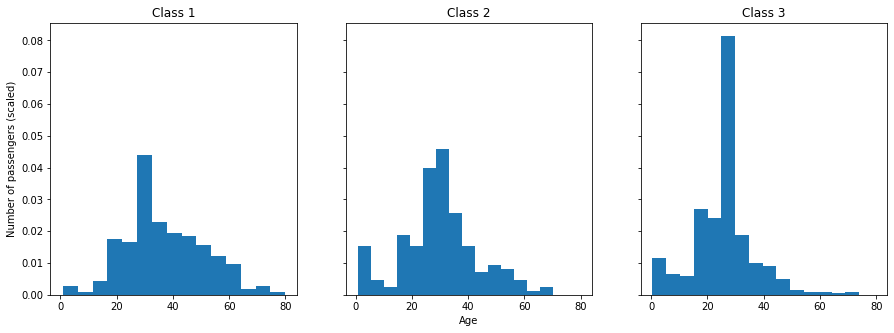

In [72]:
fig, axes = plt.subplots(1, 3, sharey = True, sharex = True, figsize = (15, 5))
axes[0].hist (data [data ['Pclass'] == 1]['Age'], bins = 15, density = True)
axes[0].set_title ('Class 1')
axes[0].set_ylabel ('Number of passengers (scaled)')

axes[1].hist (data [data ['Pclass'] == 2]['Age'], bins = 15, density = True)
axes[1].set_title ('Class 2')
axes[1].set_xlabel ('Age')

axes[2].hist (data [data ['Pclass'] == 3]['Age'], bins = 15, density = True)
axes[2].set_title ('Class 3')

plt.show()

### 26

Нарисуйте график косинуса для `x` от `-1` до `5`. 

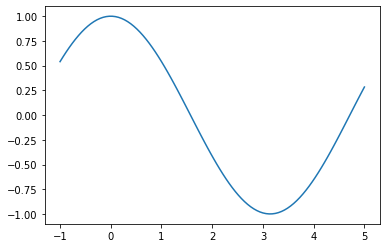

In [78]:
x = np.linspace (-1, 5, 100)
plt.plot (x, np.cos(x))
plt.show()

### 27

Используя функцию из задания №10 по numpy (gen_data), отобразите на графике сгенерированную выборку, а также настоящую прямую из которой выборка была получена. Добавьте на этот график прямую, которая приближает выборку, обучив для этого простейшую линейную регрессию. Чтобы получить параметры данной прямой, можно выполнить следующий код:

        from sklearn.linear_model import LinearRegression as LR

        data_x, data_y = gen_data(...)
        regr = LR()
        regr.fit(data_x, data_y)
        k_learned, b_learned = regr.coef_, regr.intercept_